In [115]:
import pandas as pd
df_bus = pd.read_csv('yelp_business.csv')
df_bus.shape

(174567, 13)

In [116]:
df_bus.columns

Index(['business_id', 'name', 'neighborhood', 'address', 'city', 'state',
       'postal_code', 'latitude', 'longitude', 'stars', 'review_count',
       'is_open', 'categories'],
      dtype='object')

In [117]:
df_restaurants = df_bus[df_bus['categories'].str.contains('Restaurants')]['city'].value_counts().head()

In [118]:
df_restaurants = df_bus[df_bus['categories'].str.contains('Restaurants')][['latitude','longitude']]

In [119]:
df_restaurants.head(3)

,latitude,longitude
4,41.119535,-81.475690
5,48.727200,9.147950
10,40.241548,-80.212815


In [120]:
df_restaurants.reset_index(inplace=True)
df_restaurants.head(3)

,index,latitude,longitude
0,4,41.119535,-81.475690
1,5,48.727200,9.147950
2,10,40.241548,-80.212815


In [121]:
import folium
restaurants_map = folium.Map([60.377674,-129.887219],width=1000, height=700)

In [122]:
for i in range(0,len(df_restaurants)):
   folium.features.CircleMarker( [df_restaurants.iloc[i]['latitude'], df_restaurants.iloc[i]['longitude']],
                 radius=5,
                 color='crimson').add_to(restaurants_map)
# restaurants_map.marker(location = [df_restaurants.iloc[i]['longitude'], df_restaurants.iloc[i]['latitude']], clustered_marker = True)
restaurants_map.save('rest.html')

In [28]:
restaurants_postal = df_restaurants['postal_code'].value_counts().to_frame()
print(restaurants_postal.shape)
restaurants_postal.head(2)

In [ ]:
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent = 'yelp_analysis_agent')

In [39]:
# long, lat = [],[]
# for i in range(len(restaurants_postal.index)):
#     location = geolocator.geocode({"postalcode":restaurants_postal.index[i]})
#     long.append(location.longitude)
#     lat.append(location.latitude)
# print (long, lat)

# def location(x):
#     return 
# # restaurants_postal['lat'] = location.latitude
# # restaurants_postal['long'] = location.longitude
# # restaurants_postal.head()

In [79]:
from matplotlib import pyplot as plt
%matplotlib inline

In [ ]:
plt.plot(kind='scatter', restaurants_postal)

In [2]:
df_final = pd.read_csv('Merged_user_bus_review.csv')

In [3]:
df_final.head(3)

,review_id,user_id,business_id,stars,date,Churches,Wineries,Barbeque,Nightlife,Event Planning & Services,...,Cabaret,Piano Bars,Escape Games,Dog Walkers,German,Swiss Food,Discount Store,Video Game Stores,Iberian,South African
0,ymAUG8DZfQcFTBSOiaNN4w,u0LXt3Uea_GidxRW1xcsfg,9_CGhHMz8698M9-PkVf0CQ,4,2012-05-11,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,w41ZS9shepfO3uEyhXEWuQ,u0LXt3Uea_GidxRW1xcsfg,5r6-G9C4YLbC7Ziz57l3rQ,3,2013-02-09,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,PIsUSmvaUWB00qv5KTF1xA,u0LXt3Uea_GidxRW1xcsfg,z8oIoCT1cXz7gZP5GeU5OA,4,2013-05-01,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
user_grp = df_final.groupby(['user_id']).sum()
user_grp.sort_values(by='stars',ascending=False, inplace=True)

In [100]:
user_grp.head()

,stars,Churches,Wineries,Barbeque,Nightlife,Event Planning & Services,Walking Tours,Pets,Adult Entertainment,Salvadoran,...,Cabaret,Piano Bars,Escape Games,Dog Walkers,German,Swiss Food,Discount Store,Video Game Stores,Iberian,South African
user_id,,,,,,,,,,,,,,,,,,,,,
CxDOIDnH8gp9KXzpBHJYXw,2855,0,0,28,131,16,0,0,0,1,...,0,0,0,0,2,0,0,0,0,0
Q9mA60HnY87C1TW5kjAZ6Q,1759,0,0,14,110,17,0,0,0,0,...,0,0,0,0,3,0,0,0,0,0
FREeRQtjdJU83AFtdETBBw,1472,0,0,11,115,12,0,1,0,0,...,0,0,0,0,2,0,0,0,0,0
TbhyP24zYZqZ2VJZgu1wrg,1378,0,0,12,88,15,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
0BBUmH7Krcax1RZgbH4fSA,1286,0,0,10,70,16,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [8]:
import numpy as np

In [11]:
sorted_cats = user_grp.apply(np.sort, axis = 1)

In [20]:
df_sorted = sorted_cats.to_frame()
df_sorted.rename(columns={'0':'category_list'}, inplace=True)
df_sorted.columns

Int64Index([0], dtype='int64')

In [43]:
df_sorted['top_5'] = df_sorted[0].apply(lambda l: l[-5:])
df_sorted['total'] = df_sorted[0].apply(lambda l: sum(l))
df_sorted.head()

,0,top_3,total,top_10,top_5
user_id,,,,,
CxDOIDnH8gp9KXzpBHJYXw,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[220, 884, 2855]",6262,"[69, 74, 86, 115, 130, 131, 154, 220, 884, 2855]","[131, 154, 220, 884, 2855]"
Q9mA60HnY87C1TW5kjAZ6Q,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[110, 445, 1759]",3640,"[39, 44, 52, 61, 65, 94, 106, 110, 445, 1759]","[94, 106, 110, 445, 1759]"
FREeRQtjdJU83AFtdETBBw,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[115, 350, 1472]",3120,"[47, 49, 50, 59, 74, 100, 114, 115, 350, 1472]","[100, 114, 115, 350, 1472]"
TbhyP24zYZqZ2VJZgu1wrg,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[88, 401, 1378]",2989,"[30, 31, 34, 42, 56, 68, 84, 88, 401, 1378]","[68, 84, 88, 401, 1378]"
0BBUmH7Krcax1RZgbH4fSA,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[84, 361, 1286]",2816,"[27, 40, 43, 57, 60, 68, 70, 84, 361, 1286]","[68, 70, 84, 361, 1286]"


In [61]:
df = df_sorted.drop(0, axis=1 )

In [62]:
df.drop('top_10', axis=1, inplace=True)
df.head()

,top_3,total,top_5
user_id,,,
CxDOIDnH8gp9KXzpBHJYXw,"[220, 884, 2855]",6262,"[131, 154, 220, 884, 2855]"
Q9mA60HnY87C1TW5kjAZ6Q,"[110, 445, 1759]",3640,"[94, 106, 110, 445, 1759]"
FREeRQtjdJU83AFtdETBBw,"[115, 350, 1472]",3120,"[100, 114, 115, 350, 1472]"
TbhyP24zYZqZ2VJZgu1wrg,"[88, 401, 1378]",2989,"[68, 84, 88, 401, 1378]"
0BBUmH7Krcax1RZgbH4fSA,"[84, 361, 1286]",2816,"[68, 70, 84, 361, 1286]"


In [63]:
df.shape

(73041, 3)

In [64]:
df['others'] = df.apply(lambda l: l['total']-sum(l['top_5']), axis=1)
df.head()

,top_3,total,top_5,others
user_id,,,,
CxDOIDnH8gp9KXzpBHJYXw,"[220, 884, 2855]",6262,"[131, 154, 220, 884, 2855]",2018
Q9mA60HnY87C1TW5kjAZ6Q,"[110, 445, 1759]",3640,"[94, 106, 110, 445, 1759]",1126
FREeRQtjdJU83AFtdETBBw,"[115, 350, 1472]",3120,"[100, 114, 115, 350, 1472]",969
TbhyP24zYZqZ2VJZgu1wrg,"[88, 401, 1378]",2989,"[68, 84, 88, 401, 1378]",970
0BBUmH7Krcax1RZgbH4fSA,"[84, 361, 1286]",2816,"[68, 70, 84, 361, 1286]",947


In [65]:
df = pd.concat([df['top_5'].apply(pd.Series), df], axis = 1)

In [66]:
df.head()

,0,1,2,3,4,top_3,total,top_5,others
user_id,,,,,,,,,
CxDOIDnH8gp9KXzpBHJYXw,131,154,220,884,2855,"[220, 884, 2855]",6262,"[131, 154, 220, 884, 2855]",2018
Q9mA60HnY87C1TW5kjAZ6Q,94,106,110,445,1759,"[110, 445, 1759]",3640,"[94, 106, 110, 445, 1759]",1126
FREeRQtjdJU83AFtdETBBw,100,114,115,350,1472,"[115, 350, 1472]",3120,"[100, 114, 115, 350, 1472]",969
TbhyP24zYZqZ2VJZgu1wrg,68,84,88,401,1378,"[88, 401, 1378]",2989,"[68, 84, 88, 401, 1378]",970
0BBUmH7Krcax1RZgbH4fSA,68,70,84,361,1286,"[84, 361, 1286]",2816,"[68, 70, 84, 361, 1286]",947


In [67]:
df.rename(columns={0:'Fifth', 1:'Fourth', 2:'Third', 3:'Second', 4:'Top'}, inplace=True)
df.head(3)

,Fifth,Fourth,Third,Second,Top,top_3,total,top_5,others
user_id,,,,,,,,,
CxDOIDnH8gp9KXzpBHJYXw,131,154,220,884,2855,"[220, 884, 2855]",6262,"[131, 154, 220, 884, 2855]",2018
Q9mA60HnY87C1TW5kjAZ6Q,94,106,110,445,1759,"[110, 445, 1759]",3640,"[94, 106, 110, 445, 1759]",1126
FREeRQtjdJU83AFtdETBBw,100,114,115,350,1472,"[115, 350, 1472]",3120,"[100, 114, 115, 350, 1472]",969


In [75]:
df_plot = df.head(25)

In [76]:
df_plot.reset_index(inplace=True)
df_plot.drop(['user_id','top_3', 'top_5'], axis=1, inplace=True)
df_plot.head(3)

,Fifth,Fourth,Third,Second,Top,total,others
0,131,154,220,884,2855,6262,2018
1,94,106,110,445,1759,3640,1126
2,100,114,115,350,1472,3120,969


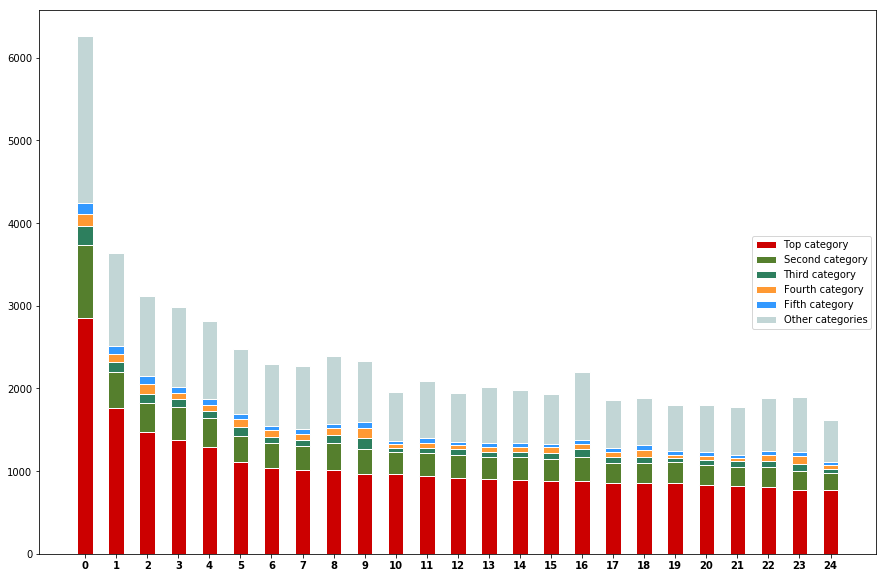

In [90]:
barWidth = 0.5
plt.figure(figsize=(15, 10))
plt.bar(df_plot.index, df_plot['Top'], color='#cc0000', edgecolor='white', width=barWidth, label='Top category')
plt.bar(df_plot.index,  df_plot['Second'], bottom=df_plot['Top'], color='#557f2d', 
        edgecolor='white', width=barWidth, label='Second category')
plt.bar(df_plot.index, df_plot['Third'], bottom=np.array(df_plot['Top'])+np.array(df_plot['Second']), color='#2d7f5e', 
        edgecolor='white', width=barWidth, label='Third category')
plt.bar(df_plot.index, df_plot['Fourth'], bottom=np.array(df_plot['Top'])+np.array(df_plot['Second'])+np.array(df_plot['Third']), 
        color='#ff9933', edgecolor='white', width=barWidth, label='Fourth category')
plt.bar(df_plot.index, df_plot['Fifth'], 
        bottom=np.array(df_plot['Top'])+np.array(df_plot['Second'])+np.array(df_plot['Third'])+np.array(df_plot['Fourth']),
        color='#3399ff', edgecolor='white', width=barWidth, label='Fifth category')
plt.bar(df_plot.index, df_plot['others'], 
        bottom=np.array(df_plot['Top'])+np.array(df_plot['Second'])+np.array(df_plot['Third'])+np.array(df_plot['Fourth'])+np.array(df_plot['Fifth']),
        color='#c2d6d6', edgecolor='white', width=barWidth, label='Other categories')
# Custom X axis
plt.xticks(df_plot.index, fontweight='bold')
# plt.xlabel("group")
plt.legend(loc='right') 
# Show graphic
plt.show()


In [106]:
df_per = df.head(30)
df_per.head(2)

,Fifth,Fourth,Third,Second,Top,top_3,total,top_5,others
user_id,,,,,,,,,
CxDOIDnH8gp9KXzpBHJYXw,131,154,220,884,2855,"[220, 884, 2855]",6262,"[131, 154, 220, 884, 2855]",2018
Q9mA60HnY87C1TW5kjAZ6Q,94,106,110,445,1759,"[110, 445, 1759]",3640,"[94, 106, 110, 445, 1759]",1126


In [107]:
df_per.reset_index(inplace=True)

In [108]:
df_per['Top'] = df_per.apply(lambda l: l['Top']/l['total']*100, axis=1)
df_per['Second'] = df_per.apply(lambda l: l['Second']/l['total']*100, axis=1)
df_per['Third'] = df_per.apply(lambda l: l['Third']/l['total']*100, axis=1)
df_per['Fourth'] = df_per.apply(lambda l: l['Fourth']/l['total']*100, axis=1)
df_per['Fifth'] = df_per.apply(lambda l: l['Fifth']/l['total']*100, axis=1)
df_per.head(2)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.

,user_id,Fifth,Fourth,Third,Second,Top,top_3,total,top_5,others
0,CxDOIDnH8gp9KXzpBHJYXw,2.091983,2.459278,3.513255,14.116896,45.592462,"[220, 884, 2855]",6262,"[131, 154, 220, 884, 2855]",2018
1,Q9mA60HnY87C1TW5kjAZ6Q,2.582418,2.912088,3.021978,12.225275,48.324176,"[110, 445, 1759]",3640,"[94, 106, 110, 445, 1759]",1126


In [109]:
df_per['others'] = df_per.apply(lambda l: l['others']/l['total']*100, axis=1)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [127]:
df_per.index = np.arange(1, len(df_per)+1)
df_per.index

Int64Index([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
            18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30],
           dtype='int64')

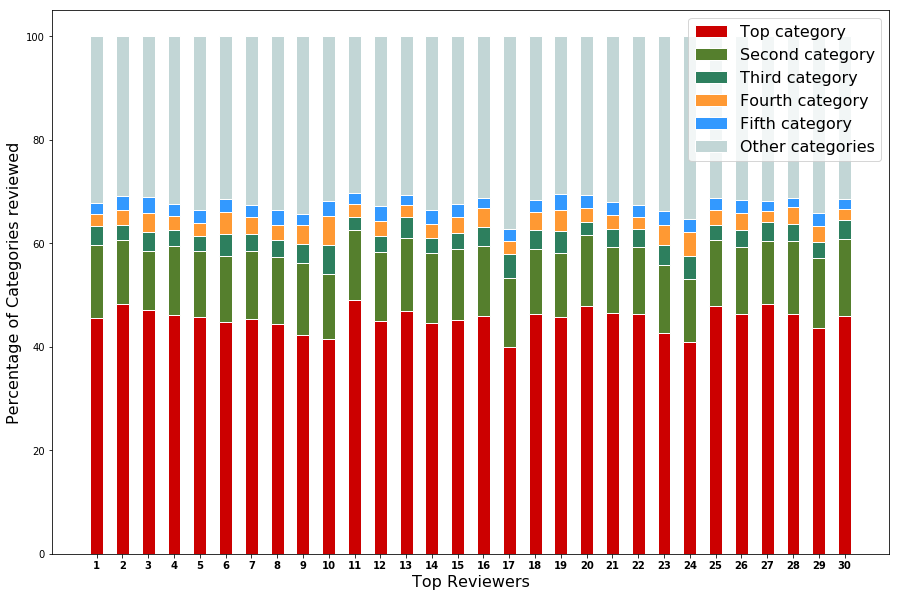

In [131]:
barWidth = 0.5
plt.figure(figsize=(15, 10))
plt.bar(df_per.index, df_per['Top'], color='#cc0000', edgecolor='white', width=barWidth, label='Top category')
plt.bar(df_per.index,  df_per['Second'], bottom=df_per['Top'], color='#557f2d', 
        edgecolor='white', width=barWidth, label='Second category')
plt.bar(df_per.index, df_per['Third'], bottom=np.array(df_per['Top'])+np.array(df_per['Second']), color='#2d7f5e', 
        edgecolor='white', width=barWidth, label='Third category')
plt.bar(df_per.index, df_per['Fourth'], bottom=np.array(df_per['Top'])+np.array(df_per['Second'])+np.array(df_per['Third']), 
        color='#ff9933', edgecolor='white', width=barWidth, label='Fourth category')
plt.bar(df_per.index, df_per['Fifth'], 
        bottom=np.array(df_per['Top'])+np.array(df_per['Second'])+np.array(df_per['Third'])+np.array(df_per['Fourth']),
        color='#3399ff', edgecolor='white', width=barWidth, label='Fifth category')
plt.bar(df_per.index, df_per['others'], 
        bottom=np.array(df_per['Top'])+np.array(df_per['Second'])+np.array(df_per['Third'])+np.array(df_per['Fourth'])+np.array(df_per['Fifth']),
        color='#c2d6d6', edgecolor='white', width=barWidth, label='Other categories')
plt.xticks(df_per.index, fontweight='bold')
plt.xlabel("Top Reviewers", fontsize=16)
plt.ylabel("Percentage of Categories reviewed", fontsize=16)
plt.legend(loc='upper right', fontsize=16) 
plt.savefig('Category_distribution.png')
#plt.show()


In [134]:
df_review_ct = df_final.user_id.value_counts().to_frame()

In [136]:
df_review_ct.head(1)

,user_id
CxDOIDnH8gp9KXzpBHJYXw,884


In [137]:
df_review_ct.rename(columns={'user_id':'num_reviews'}, inplace=True)
df_review_ct.head(1)

,num_reviews
CxDOIDnH8gp9KXzpBHJYXw,884


In [141]:
df_review_ct.shape

(73041, 2)

In [142]:
df_review_ct.sort_values(by='num_reviews', inplace=True)
df_review_ct['cum_review_ct'] = df_review_ct['num_reviews'].cumsum()
df_review_ct.head()

,num_reviews,cum_review_ct
-_bwDMfHlRZ_qtTCdFstRA,1,1
jhljCCdVzWfZvtTYxmMJYw,1,2
uJXJZ5hkw7MulZ4wRVp1Dg,1,3
F-e2u499vq0crIf4xDN5VA,1,4
OyV5WkaqoQH4fdQ7rTzALw,1,5


In [152]:
# total_reviews = df_review_ct['num_reviews'].sum()
# df_review_ct['cum_review_percent'] = df_review_ct['cum_review_ct']/total_reviews * 100
# df_review_ct.head(2)
df_review_ct.tail(2)

,index,num_reviews,cum_review_ct,cum_review_percent
73039,Q9mA60HnY87C1TW5kjAZ6Q,445,302896,99.709
73040,CxDOIDnH8gp9KXzpBHJYXw,884,303780,100.000


In [144]:
df_review_ct.reset_index(inplace=True)
df_review_ct.head(2)

,index,num_reviews,cum_review_ct,cum_review_percent
0,-_bwDMfHlRZ_qtTCdFstRA,1,1,0.000329
1,jhljCCdVzWfZvtTYxmMJYw,1,2,0.000658


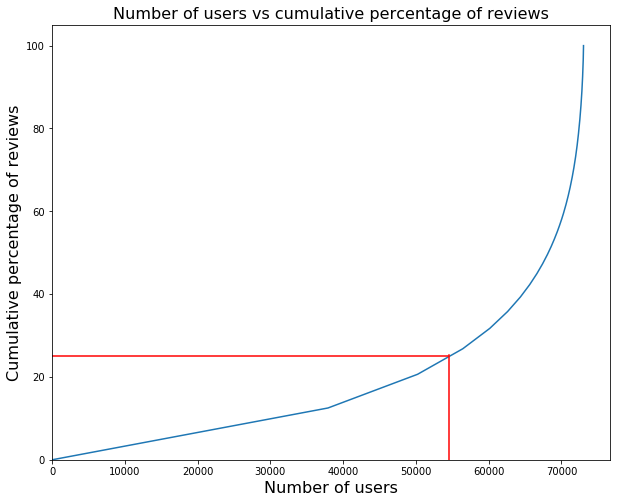

In [173]:
plt.figure(figsize=(10,8))
plt.plot(df_review_ct.index, df_review_ct['cum_review_percent'])
plt.xlabel('Number of users',fontsize=16)
plt.ylabel('Cumulative percentage of reviews',fontsize=16)
plt.title('Number of users vs cumulative percentage of reviews',fontsize=16)
plt.axvline(x=54500, ymax=0.24, color='r')
plt.axhline(y=25 , xmax = 0.71, color='r')
plt.xlim(0,None)
plt.ylim(0,None)
# plt.show()
plt.savefig('Cumulative_review_num_users')

In [148]:
df_toronto = df_bus[(df_bus['categories'].str.contains('Restaurants')) & (df_bus['city']== 'Toronto')]
df_toronto.sort_values(by='review_count', inplace=True)
df_toronto['cum_review_ct'] = df_toronto['review_count'].cumsum()
df_toronto[['review_count', 'cum_review_ct']].tail()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,review_count,cum_review_ct
80828,945,298836
131553,973,299809
9526,1184,300993
158973,1270,302263
107580,1494,303757


In [149]:
total_reviews = df_toronto['review_count'].sum()
df_toronto['cum_review_percent'] = df_toronto['cum_review_ct']/total_reviews * 100
df_toronto.head(2)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,business_id,name,neighborhood,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,categories,cum_review_ct,cum_review_percent
130487,wlj66szhtfszQUUa7P1_tg,"""Kincious noodle house""",NaN,"""4750 Yonge st Unit # 141""",Toronto,ON,M2N 5M6,43.760067,-79.410974,3.5,3,1,Noodles;Restaurants,3,0.000988
88495,-tkBz5ZuUKiWcfxq59jD2g,"""J Pizza Plus""",NaN,"""314 Parliament Street""",Toronto,ON,M5A 2Z7,43.659440,-79.366010,1.5,3,1,Middle Eastern;Pizza;Restaurants,6,0.001975


In [150]:
df_toronto.reset_index(inplace=True)

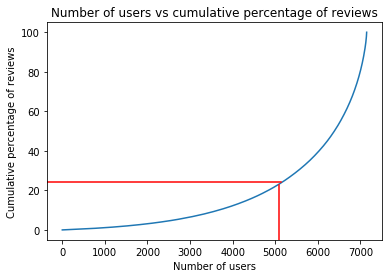

In [155]:
s = df_toronto['cum_review_percent']
plt.plot(s.index, s.values)
plt.xlabel('Number of users')
plt.ylabel('Cumulative percentage of reviews')
plt.title('Number of users vs cumulative percentage of reviews')
plt.axvline(x=5100, ymax=0.25, color='r')
plt.axhline(y=24 , xmax = 0.70, color='r')

plt.show()